In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords , wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from spellchecker import SpellChecker
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
initial_dataset = pd.read_csv('isear.csv')
initial_dataset.head()

,Emotions,Statements
0,joy,[ On days when I feel close to my partner and ...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [6]:
# Fetching all the emotions and it's count present in the dataset
emotions = initial_dataset['Emotions'].value_counts()
print(emotions)
print(f"Total entries in the dataset : {emotions.sum()}")

Emotions
anger      1094
sadness    1094
disgust    1094
shame      1094
fear       1093
joy        1092
guilt      1091
Name: count, dtype: int64
Total entries in the dataset : 7652


In [7]:
# To check if there are any null values present in the dataset
print(initial_dataset.isnull().sum())

Emotions      0
Statements    0
dtype: int64


In [8]:
# To check if there are any duplicate values present in the dataset
print(initial_dataset["Statements"].duplicated().sum())

# Displaying all the duplicates present in the dataset
duplicates = initial_dataset[initial_dataset.duplicated()]

#Print all the unique duplicates present in the dataset
print(duplicates.value_counts())

163
Emotions  Statements                                                                     
shame     [ No response.]                                                                    20
guilt     [ No response.]                                                                    13
disgust   [ No response.]                                                                    12
sadness   [ No response.]                                                                    11
          When my grandfather died.                                                           7
anger     [ No response.]                                                                     7
sadness   When my grandmother died.                                                           5
fear      [ No response.]                                                                     4
shame     Not doing well in the examn.                                                        3
sadness   When my grandmother passed away.

In [9]:
null_responses = ["[ No response.]","[ Do not know.]","NO RESPONSE.","Doesn't apply.","Does not apply.","[ Can not think of anything just now.]" , "[ No description.]" , "[ Never felt the emotion.]" , "[ I have never felt this emotion.]" , "[ Never experienced.]" , "[ Never.]" , "[ Do not remember any incident.]"]

# Removing the rows containing null responses
null_removed_dataset = initial_dataset[~initial_dataset['Statements'].isin(null_responses)]

# To check if there are any null values present in the dataset
print(null_removed_dataset.isnull().sum())

Emotions      0
Statements    0
dtype: int64


In [10]:
# Fetching all the emotions and it's count present in the dataset
updated_emotions = null_removed_dataset['Emotions'].value_counts()
print(updated_emotions)
print(f"Total entries in the dataset : {updated_emotions.sum()}")

Emotions
joy        1088
fear       1085
anger      1084
sadness    1082
disgust    1076
guilt      1067
shame      1063
Name: count, dtype: int64
Total entries in the dataset : 7545


In [11]:
# To check if there are any duplicate values present in the dataset
print(null_removed_dataset["Statements"].duplicated().sum())

# Displaying all the duplicates present in the dataset
updated_duplicates = null_removed_dataset[null_removed_dataset.duplicated()]

#Print all the unique duplicates present in the dataset
print(updated_duplicates.value_counts())

68
Emotions  Statements                                                                     
sadness   When my grandfather died.                                                          7
          When my grandmother died.                                                          5
shame     Not doing well in the examn.                                                       3
sadness   When my grandmother passed away.                                                   3
          When my dog died.                                                                  2
          When my father died.                                                               2
joy       Getting into this university to do medicine.                                       2
          When I was admitted to the University.                                             2
shame     Failing an examn.                                                                  2
fear      Before the examn.                         

In [12]:
print(updated_duplicates)

     Emotions                                         Statements
716   sadness                        When my girlfriend left me.
771   sadness                          When my grandmother died.
1022  sadness                       The death of my grandmother.
1267  sadness                          When my grandfather died.
1346  sadness                When my grandmother died of cancer.
1547  sadness                          When my grandmother died.
2088  sadness                               When my father died.
2278  sadness                          When my grandmother died.
2507  sadness                                  When my dog died.
2549  sadness                          When my grandmother died.
2758  sadness                          When my grandfather died.
2844      joy                              When my son was born.
2900      joy             When I was admitted to the University.
2951      joy             When I was admitted to the University.
4177  sadness            

Emotions
joy        14.420146
fear       14.380384
anger      14.367131
sadness    14.340623
disgust    14.261100
guilt      14.141816
shame      14.088801
Name: count, dtype: float64


<Axes: xlabel='Emotions', ylabel='count'>

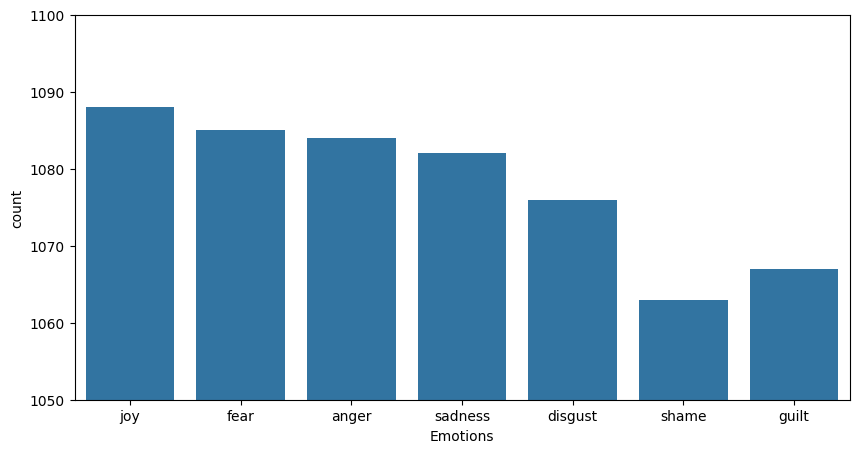

In [13]:
# Percentage of emotions present in the dataset
emotions_percentage = updated_emotions/sum(updated_emotions)*100
print(emotions_percentage)

# Plot the emotions vs it's count as a bar plot and keep the scale of count from 1050 to 1100
plt.figure(figsize=(10,5))
plt.ylim(1050, 1100)
sns.countplot(x='Emotions', data=null_removed_dataset)

In [14]:
# Finding the stop words for each statement
# copy_dataset = null_removed_dataset.copy()
# copy_dataset['Statements'] = copy_dataset['Statements'].str.lower()
# stop_words = set(stopwords.words('english'))
# copy_dataset['stop_words'] = copy_dataset['Statements'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
# copy_dataset.head()

In [15]:
# Data Cleaning

# def spell_check(text):
#     # Spellcheker object
#     spell = SpellChecker()

#     # Load a custom dictionary or add custom words to the dictionary
#     custom_words = ["domain-specific", "vocabulary"]
#     spell.word_frequency.load_words(custom_words)

#     # Set a threshold for accepting suggestions based on word frequency
#     spell.distance = 2  # Set the Levenshtein distance threshold

#     # Example sentence with misspellings
#     sentence = "Ths sentance has some misspellings and i am unhapy."

#     # Tokenize the sentence into words
#     words = sentence.split()

#     # Correct each word in the sentence
#     corrected_words = []
#     for word in words:
#         # Check if the word is misspelled
#         if spell.unknown([word]):
#             # Correct the misspelled word
#             corrected_word = spell.correction(word)
#             corrected_words.append(corrected_word)
#         else:
#             # Keep the original word if it's correctly spelled
#             corrected_words.append(word)

#     # Join the corrected words back into a sentence
#     corrected_sentence = " ".join(corrected_words)
#     print("Original sentence:", sentence)
#     print("Corrected sentence:", corrected_sentence)


def convert_to_lower_case(text):
    return text.lower()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_stop_words(text):
    return ' '.join([word for word in str(text).split() if word not in stop_words])

def get_wordnet_pos(word):
    # Map POS tag to first character that the lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(text)])


def cleaned_sentence(text):
    # text = spell_check(text)
    text = convert_to_lower_case(text)
    text = remove_special_characters(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = remove_stop_words(text)
    text = lemmatization(text)
    return text

text1 = "Every time I imagine that someone I love or I could contact a serious illness, even death."
print("Original Sentence : ", text1)
print("Number of words in the Sentence : ",len(text1.split()))
cleaned1 = cleaned_sentence(text1)
print("Cleaned Sentence : ", cleaned1)
print("Stop words present in the Sentence : ",([word for word in text1.split() if word in stop_words]))

Original Sentence :  Every time I imagine that someone I love or I could contact a serious illness, even death.
Number of words in the Sentence :  17
Cleaned Sentence :  every time imagine someone love could contact serious illness even death
Stop words present in the Sentence :  ['that', 'or', 'a']


In [16]:
text2 = "I am happy this shit finally got done, ; I can't stop crying  & I will start singing. !"
print("Original Sentence : ", text2)
print("Number of words in the Sentence : ",len(text2.split()))
cleaned2 = cleaned_sentence(text2)
print("Cleaned Sentence : ", cleaned2)
print("Stop words present in the Sentence : ",([word for word in text2.split() if word in stop_words]))

Original Sentence :  I am happy this shit finally got done, ; I can't stop crying  & I will start singing. !
Number of words in the Sentence :  19
Cleaned Sentence :  happy shit finally get do cant stop cry start sing
Stop words present in the Sentence :  ['am', 'this', 'will']


In [17]:
X = []
sentences = list(null_removed_dataset['Statements'])
for sen in sentences:
    X.append(cleaned_sentence(sen))

In [18]:
y = null_removed_dataset['Emotions']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [21]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6}


In [22]:
from nltk.tokenize import word_tokenize
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in X_train]

In [23]:
from gensim.models import Word2Vec
vector_size = 100
window_size = 2
min_freq_count = 1
worker_threads = 6

word2vec_model = Word2Vec(sentences = tokenized_corpus, vector_size = vector_size, window =window_size, min_count = min_freq_count, workers = worker_threads)

word_vec = word2vec_model.wv

#check vocab once
vocab = word2vec_model.wv.key_to_index
print(vocab)

for word, index in vocab.items():
    print(f"Word: {word}, Index: {index}")

{'friend': 0, 'felt': 1, 'go': 2, 'get': 3, 'one': 4, 'time': 5, 'day': 6, 'come': 7, 'make': 8, 'year': 9, 'home': 10, 'mother': 11, 'told': 12, 'would': 13, 'people': 14, 'school': 15, 'take': 16, 'person': 17, 'feel': 18, 'saw': 19, 'girl': 20, 'see': 21, 'father': 22, 'first': 23, 'could': 24, 'want': 25, 'mine': 26, 'night': 27, 'work': 28, 'give': 29, 'say': 30, 'something': 31, 'disgust': 32, 'didnt': 33, 'boyfriend': 34, 'someone': 35, 'know': 36, 'back': 37, 'car': 38, 'die': 39, 'ask': 40, 'exam': 41, 'found': 42, 'angry': 43, 'parent': 44, 'brother': 45, 'close': 46, 'thought': 47, 'good': 48, 'another': 49, 'like': 50, 'try': 51, 'sister': 52, 'man': 53, 'girlfriend': 54, 'talk': 55, 'love': 56, 'away': 57, 'thing': 58, 'child': 59, 'pass': 60, 'ashamed': 61, 'two': 62, 'old': 63, 'guilty': 64, 'class': 65, 'without': 66, 'much': 67, 'start': 68, 'even': 69, 'way': 70, 'well': 71, 'study': 72, 'sad': 73, 'left': 74, 'heard': 75, 'later': 76, 'fear': 77, 'house': 78, 'long':

In [24]:
# Define a function to find similar words for each word in the vocabulary
def find_similar_words(word, word2vec_model, top_n=5):
    try:
        similar_words = word2vec_model.wv.similar_by_word(word, topn=top_n)
        return similar_words
    except KeyError:
        print(f"Word '{word}' not found in the vocabulary.")

# Find similar words for each word in the vocabulary
similar_words_dict = {}
for word in vocab.keys():
    similar_words = find_similar_words(word, word2vec_model)
    similar_words_dict[word] = similar_words

# Print similar words for each word in the vocabulary
for word, similar_words in similar_words_dict.items():
    print(f"Similar words for '{word}':")
    for similar_word, similarity in similar_words:
        print(f"- {similar_word}: {similarity}")
    print()


Similar words for 'friend':
- girlfriend: 0.999254047870636
- someone: 0.9992464184761047
- work: 0.9992185235023499
- told: 0.9992139935493469
- call: 0.9992110133171082

Similar words for 'felt':
- feel: 0.9995509386062622
- really: 0.9989928603172302
- make: 0.9988471865653992
- try: 0.9988349080085754
- people: 0.9988303780555725

Similar words for 'go':
- start: 0.9996500015258789
- give: 0.9996335506439209
- one: 0.9996328949928284
- place: 0.9996201992034912
- saw: 0.9995997548103333

Similar words for 'get':
- people: 0.999631941318512
- give: 0.9996235370635986
- try: 0.9996147155761719
- found: 0.9996052384376526
- use: 0.9996016621589661

Similar words for 'one':
- go: 0.9996330142021179
- take: 0.9994752407073975
- without: 0.9994641542434692
- u: 0.9994566440582275
- house: 0.9994500279426575

Similar words for 'time':
- lose: 0.9993302226066589
- start: 0.9993295073509216
- two: 0.999281108379364
- walk: 0.9992617964744568
- get: 0.9992595314979553

Similar words for 'day

In [25]:
# Prepare embedding matrix
embedding_matrix = np.zeros((len(vocab), vector_size))  # Assuming 'vocab' contains the vocabulary
for word, i in vocab.items():
    embedding_vector = word2vec_model.wv[word]  # Get the embedding vector for the word
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  # Assign the embedding vector to the corresponding row in the embedding matrix

In [26]:
embedding_matrix

array([[-2.20004246e-01,  4.08633560e-01,  4.64719310e-02, ...,
        -4.04204607e-01,  5.89741133e-02, -1.92394540e-01],
       [-2.60864288e-01,  4.44644630e-01,  5.44565767e-02, ...,
        -4.48226988e-01,  2.64499113e-02, -2.16895863e-01],
       [-2.39489093e-01,  4.33514684e-01,  3.26297805e-02, ...,
        -4.18654501e-01,  6.55598342e-02, -2.21415609e-01],
       ...,
       [-5.08382358e-03,  1.98005553e-04,  1.27213146e-03, ...,
        -1.27502978e-02, -6.37352234e-03, -9.78066958e-03],
       [-3.64770740e-03,  3.78985424e-03,  9.60378908e-04, ...,
        -1.13436459e-02, -8.76414403e-03, -1.81138294e-03],
       [-2.56421301e-03,  1.01212282e-02, -4.31738934e-03, ...,
        -1.03754224e-02, -8.86237528e-03, -2.41305213e-03]])

In [27]:
vocabulary = set([word for sentence in tokenized_corpus for word in sentence])
vocab_size = len(vocabulary)
vocab_size

6452

In [28]:
embedding_matrix.shape

(6452, 100)

In [29]:
tokenized_corpus

[['broke', 'piggy', 'bank', 'brother', 'mother', 'discover'],
 ['grandmother', 'die'],
 ['one',
  'night',
  'dinner',
  'nephew',
  'naughty',
  'quarrel',
  'parent',
  'regret',
  'nephew',
  'two',
  'year',
  'old',
  'tolerate',
  'quarrel',
  'make',
  'father',
  'think',
  'child',
  'may',
  'take',
  'care',
  'future',
  'slip',
  'tongue',
  'make',
  'realize',
  'father',
  'keep',
  'thought',
  'still',
  'angry',
  'drop',
  'bowl',
  'chopstick',
  'go',
  'kitchen',
  'drink',
  'tea',
  'ran',
  'side',
  'house'],
 ['go',
  'around',
  'girl',
  'without',
  'love',
  'go',
  'around',
  'many',
  'thing',
  'end',
  'sincere'],
 ['sportwoman',
  'well',
  'felt',
  'joy',
  'year',
  'practice',
  'contest',
  'cover',
  'norm',
  'master',
  'sport'],
 ['heard', 'select', 'university'],
 ['late', 'one', 'night', 'pursue', 'gipsy', 'good', 'intention'],
 ['feign', 'sick', 'leave', 'work'],
 ['mum', 'learnt', 'beaten', 'someone', 'fight'],
 ['elder',
  'sister',
 

In [30]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize


tokenizer = Tokenizer()

# Fit tokenizer on the tokenized corpus
tokenizer.fit_on_texts(tokenized_corpus)

# Convert tokenized corpus to sequences of token IDs using the tokenizer
sequences = tokenizer.texts_to_sequences(tokenized_corpus)

# Pad sequences to the same length
max_sequence_length = 10  # Choose an appropriate length based on your data
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

print(padded_sequences)


[[ 175 2416  914 ...    0    0    0]
 [ 194   40    0 ...    0    0    0]
 [   5   28  324 ...  915  654   63]
 ...
 [  35  237  106 ...    0    0    0]
 [1391   55  312 ...    0    0    0]
 [ 357  723   24 ... 1079  158  662]]


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense





embedding_dim = 200  # You can adjust this based on your embedding matrix
lstm_units = 128  # Number of LSTM units
num_words = 6452
max_length = 877
num_classes = 7

model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, weight=[embedding_matrix]),
    LSTM(units=lstm_units),
    Dense(units=num_classes, activation='softmax')  # Adjust activation based on your task
])





ValueError: Unrecognized keyword arguments passed to Embedding: {'weight': [array([[-2.20004246e-01,  4.08633560e-01,  4.64719310e-02, ...,
        -4.04204607e-01,  5.89741133e-02, -1.92394540e-01],
       [-2.60864288e-01,  4.44644630e-01,  5.44565767e-02, ...,
        -4.48226988e-01,  2.64499113e-02, -2.16895863e-01],
       [-2.39489093e-01,  4.33514684e-01,  3.26297805e-02, ...,
        -4.18654501e-01,  6.55598342e-02, -2.21415609e-01],
       ...,
       [-5.08382358e-03,  1.98005553e-04,  1.27213146e-03, ...,
        -1.27502978e-02, -6.37352234e-03, -9.78066958e-03],
       [-3.64770740e-03,  3.78985424e-03,  9.60378908e-04, ...,
        -1.13436459e-02, -8.76414403e-03, -1.81138294e-03],
       [-2.56421301e-03,  1.01212282e-02, -4.31738934e-03, ...,
        -1.03754224e-02, -8.86237528e-03, -2.41305213e-03]])]}